In [43]:
import geopandas
import rioxarray
import xarray
from shapely.geometry import mapping
import numpy as np

In [50]:
MSWEP_monthly2 = xarray.open_dataset(r'F:\Osmanabad\MERRA2_400.tavg1_2d_flx_Nx.20200101.nc4')

In [51]:
MSWEP_monthly2

<xarray.Dataset>
Dimensions:      (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon          (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat          (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time         (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-01-01T23:...
Data variables: (12/46)
    BSTAR        (time, lat, lon) float32 ...
    CDH          (time, lat, lon) float32 ...
    CDM          (time, lat, lon) float32 ...
    CDQ          (time, lat, lon) float32 ...
    CN           (time, lat, lon) float32 ...
    DISPH        (time, lat, lon) float32 ...
    ...           ...
    TSTAR        (time, lat, lon) float32 ...
    ULML         (time, lat, lon) float32 ...
    USTAR        (time, lat, lon) float32 ...
    VLML         (time, lat, lon) float32 ...
    Z0H          (time, lat, lon) float32 ...
    Z0M          (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Mon Jan 13 21...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_flx_Nx.20200101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/7MCPBJ41Y0K6
    RangeBeginningDate:                2020-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2020-01-01
    RangeEndingTime:                   23:59:59.000000

In [52]:
MSWEP_monthly2 = MSWEP_monthly2.ULML

In [70]:
MSWEP_monthly2.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
MSWEP_monthly2.rio.write_crs("epsg:4326", inplace= True)
Africa_Shape = geopandas.read_file(r'G:\Indian_shape_files\output.shp', crs="epsg:4326")
clipped = MSWEP_monthly2.rio.clip(Africa_Shape.geometry.apply(mapping), Africa_Shape.crs, drop=True)

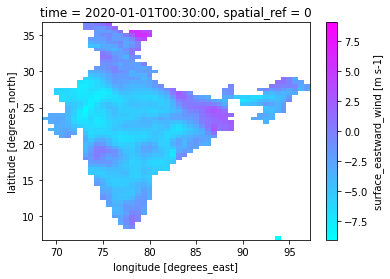

In [71]:
clipped[0].plot(cmap ='cool')